<div align="center">

### PROGRAMACIÓN Y MÉTODOS NUMÉRICOS ORIENTADOS AL TRATAMIENTO DE INFORMACIÓN SATELITAL

#### TRABAJO FINAL

#### **Modelado del Salto de Félix Baumgartner**

##### Barra, Camilo Giuliano
</div>

> #### Contenido:
* Introducción  
* Exploración de los datos reales del experimento  
* Modelado   
* Análisis de puntos críticos  
* Bibliografía  
* Final  

> ##### Introducción

El 14 de octubre de 2012, el paracaidista austríaco Félix Baumgartner hizo historia al realizar un salto en caída libre desde la estratósfera, alcanzando una velocidad máxima de Mach 1.25 (1342 km/h) y rompiendo varios récords mundiales en el proceso.

El salto fue patrocinado por Red Bull Stratos, un proyecto que tuvo como objetivo estudiar los límites de la resistencia humana y la física del vuelo a elevadas altitudes. Baumgartner saltó desde una cápsula suspendida a una altitud de aproximadamente 39 kilómetros sobre la superficie de la Tierra, en la estratosfera. Durante su descenso, experimentó condiciones extremas, incluyendo la baja presión y temperatura del aire, así como la velocidad supersónica.

El salto de Baumgartner no sólo representó una oportunidad única para estudiar y comprender mejor los fenómenos físicos involucrados en la caída libre desde alturas extremas. En este trabajo, se explora este salto utilizando un modelado y simulación para analizar los aspectos técnicos y físicos involucrados.

El video puede observarse en: [Video del salto "Red Bull Stratos"](https://www.youtube.com/watch?v=vEOLJxJPTD8)

<img src="./imagenes/felix3.jpg" width="650" height="400">
<img src="./imagenes/felix2.jpeg" width="570" height="400">

Primeramente, se exploran los datos reales a partir del archivo `jumpdata.csv`.
Se obtienen 3 gráficos:  
- Altitud vs tiempo
- Velocidad vs tiempo
- Velocidad vs altitud

Se representó en dichos gráficos la velocidad del sonido y la tropopausa aproximada (límite entre la estratósfera y la tropósfera).

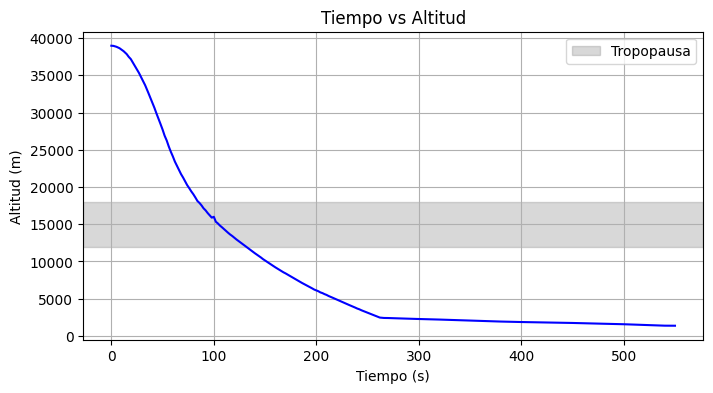

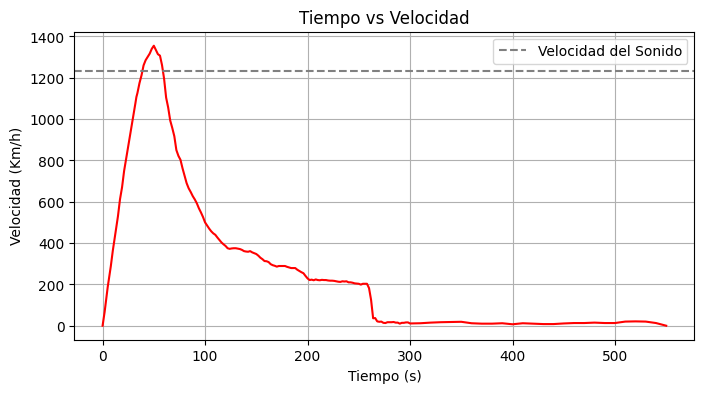

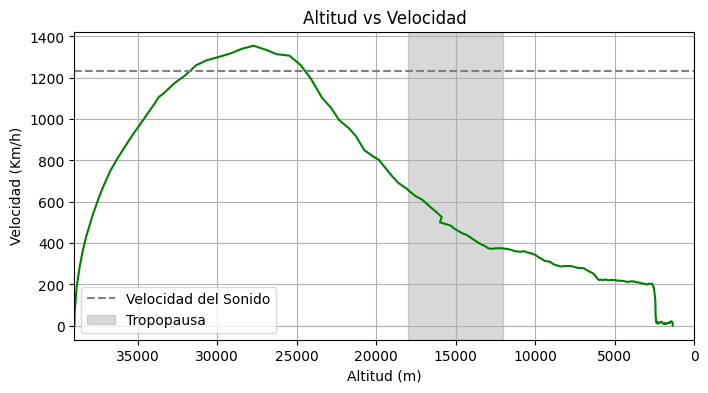

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("./jumpdata.csv")

tiempo = dataframe['Time (s)']
altitud = dataframe['Altitude (m)']
velocidad = dataframe['Speed (Km/h)']

velocidad_del_sonido = 343 * 3.6

plt.figure(figsize=(8, 4))
plt.plot(tiempo, altitud, color='blue')
plt.title('Tiempo vs Altitud')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altitud (m)')
plt.grid(True)
plt.axhspan(12000, 18000, color='gray', alpha=0.3, label='Tropopausa')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(tiempo, velocidad, color='red')
plt.title('Tiempo vs Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (Km/h)')
plt.axhline(y=velocidad_del_sonido, color='gray', linestyle='--', label='Velocidad del Sonido')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(altitud, velocidad, color='green')
plt.title('Altitud vs Velocidad')
plt.xlabel('Altitud (m)')
plt.ylabel('Velocidad (Km/h)')
plt.axhline(y=velocidad_del_sonido, color='gray', linestyle='--', label='Velocidad del Sonido')
plt.legend()
plt.xlim(max(altitud), 0)
plt.grid(True)
plt.axvspan(12000, 18000, color='gray', alpha=0.3, label='Tropopausa')
plt.legend()
plt.show()

El sistema de EDOs utilizado en el trabajo modela el movimiento del paracaidista durante su descenso desde la estratósfera hasta la superficie terrestre. Este sistema de EDOs está compuesto por dos ecuaciones principales que describen la evolución temporal de dos variables clave:

Las ecuaciones diferenciales del sistema son las siguientes (Guerster & Walter, 2017):

\begin{align*}
\frac{{dx}}{{dt}} &= v \quad \text{(Velocidad)} \\\\
\frac{{dv}}{{dt}} &= \left(\frac{{1}}{{m}} \cdot \frac{{1}}{{2}} \cdot \rho \cdot C_d \cdot A \cdot v^2 - g \right) \quad \text{(Aceleración)}
\end{align*}

Donde:  
- $v$ es la velocidad del paracaidista ($\frac{{m}}{{s}}$).
- $m$ es la masa total del sistema: el peso del paracaidista y su traje ($kg$).
- $\rho$ es la densidad del aire ($\frac{{kg}}{{m^3}}$).
- $Cd$ es el coeficiente de arrastre (= resistencia) (adimensional).
- $A$ es el área transversal ($m^2$).
- $g$ es la aceleración gravitacional ($\frac{{m}}{{s^2}}$)

En la primera ecuación se describe la tasa de cambio de la altura del paracaidista con respecto al tiempo, la cual es igual a la velocidad del paracaidista en un instante dado ($v(t)$). Esta ecuación simplemente expresa el hecho de que la altura cambia en función de la velocidad.

En la segunda ecuación se describe la tasa de cambio de la velocidad del paracaidista con respecto al tiempo. Esta ecuación es más compleja y modela la fuerza neta experimentada por el paracaidista, la cual incluye términos que representan la resistencia del aire, la gravedad y otros factores como el área transversal, el coeficiente de arrastre y la densidad del aire. La velocidad terminal del paracaidista se alcanza cuando la fuerza de arrastre iguala a la fuerza gravitacional, lo que resulta en una velocidad constante.

----

Cabe notar que el modelo tratado en el presente trabajo se clasifica como un **sistema de ecuaciones diferenciales ordinales dinámico autónomo de orden 1 y no lineal**. Esto es porque:

* Sistema de ecuaciones diferenciales: porque hay dos funciones incógnitas.  
* Ordinarias: la funciones incógnitas dependen de una sola variable independiente. En este caso, $t$.
* Dinámico: porque se describe cómo cambia en realción al tiempo.
* Autónomo: ninguna de las ecuaciones involucra a $t$ de forma explícita.
* Orden 1: es la derivada más alta que aparece.
* No lineal: porque en la segunda ecuación la función incógnita aparece una potencia de 2.

----

A continuación, se describen brevemente las bibliotecas utilizadas:

1. **math**: Esta biblioteca proporciona funciones matemáticas básicas.

2. **pandas**: Se utiliza principalmente para manipulación y análisis de datos, incluyendo limpieza de datos, filtrado, agrupación, transformaciones, etc.

3. **matplotlib**: Se utiliza para crear visualizaciones y gráficos de datos, como gráficos de líneas, diagramas de dispersión, histogramas, etc.

4. **numpy**: Utilizado para realizar operaciones matemáticas y estadísticas en matrices, como álgebra lineal, generación de números aleatorios, manipulación de datos, etc. 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

El modelo utiliza una gama de constantes y valores físicos. Todos estos números se han tomado de varios enlaces, los cuales se enumeran a continuación:

- [Temperatura vs altitud](https://es.wikipedia.org/wiki/Gradiente_t%C3%A9rmico) y [Omni Calculator](https://www.omnicalculator.com/physics/altitude-temperature)
- [Presión vs altitud](https://www.herramientasingenieria.com/onlinecalc/spa/altitud/altitud.html)
- [Masa total](http://www.redbullstratos.com/the-mission/mission-timeline/)
- [Coeficiente de resistencia del hombre](https://es.wikipedia.org/wiki/Coeficiente_de_resistencia#General)
- [Coeficiente de resistencia del paracaídas](https://www.instructables.com/Calculating-the-Performance-of-a-Parachute/)
- [Área transversal del hombre](https://en.wikipedia.org/wiki/Physiological_cross-sectional_area)
- [Área transversal del paracaídas](http://www.redbullstratos.com/technology/parachute/)
- [Densidad del aire, masa molar del aire](https://es.wikipedia.org/wiki/Densidad_del_aire)
- [Masa de la Tierra](https://es.wikipedia.org/wiki/Tierra)
- [Radio de la Tierra](https://es.wikipedia.org/wiki/Radio_terrestre)
- [Constante gravitacional](https://es.wikipedia.org/wiki/Constante_de_gravitaci%C3%B3n_universal)

In [3]:
# Constantes globales
masa_tierra = 5.9736e24 # kg
radio_tierra = 6371009 # m
constante_gravitacional = 6.67385e-11 # m3/(kg * s^2)
altura_inicial = 39045.0 # m (altura del salto)
inicio_liberacion_paracaidas = 4.0 * 60.0 + 16.0 # s
fin_liberacion_paracaidas = 4.0 * 60.0 + 20.0 # s
tiempo_final = 9.0 * 60.0 # s
masa_total = 118 #kg (peso de Félix más su equipo)
c_d_persona = 1.15 # adimensional
c_d_paracaidas = 1.5 # adimensional
area_transversal_persona = 0.73 # m^2
area_paracaidas = 25.0 # m^2
area_transversal_paracaidas = 4.0 * area_paracaidas / math.pi ** 2
M = 0.0289644 # kg/mol, masa molar del aire
R = 8.31447 # J/(mol * K), constante universal de los gases

In [4]:
# Cambios de temperatura del aire dependiendo de la altitud, (m, K).
temp_alt = ((0.0, 15.0 + 273), (11.0e3, -56.5 + 273), (20.1e3, -56.5 + 273), (32.2e3, -44.5 + 273), (47.3e3, -2.5 + 273))

# Cambios de presión del aire dependiendo de la altitud, (m, Pa)
pres_alt = ((0.0, 101325.0), (11.0e3, 22630.5), (20.1e3, 5474.27), (32.2e3, 867.849), (47.3e3, 110.874))

In [5]:
# Se definen el paso de tiempo, el número de pasos y los tiempos

h = 0.1 # s
num_pasos = int(tiempo_final / h) # o sea, 5400 porque 9 minutos = 540 segundos y h = 0.1
tiempos = h * np.array(range(num_pasos + 1)) # (s) o sea, 0, 0.1, 0.2, 0.3, ..., 5400

La siguiente función calcula la temperatura del aire a una altitud dada. Lo que hace es interpolar linealmente entre los puntos de temp_alt.  
Se itera sobre pares de valores adyacentes en la lista temp_alt. Estos pares representan puntos clave que definen segmentos de la altitud y la temperatura.  
Se verifica si la altitud proporcionada se encuentra dentro del rango de altitudes del segmento actual definido por los puntos izquierda y derecha. Por izquierda y derecha, entiéndase, la anterior y la posterior.  
Si la altitud proporcionada está dentro del rango del segmento, se realiza una interpolación lineal para determinar la temperatura del aire en esa altitud. Esta fórmula calcula la temperatura interpolada utilizando los valores de temperatura y altitud en los puntos izquierda y derecha.  
Si la altitud proporcionada está fuera del rango de altitudes en la lista temp_alt, se genera una excepción ValueError. Esto es importante para alertar si se elige alguna condición inicial demasiado extrema.  

**El objetivo de crear esta función (junto con la siguiente de presión vs altitud) es poder utilizarla más adelante para obtener las condiciones ambientales (tales como densidad del aire, temperatura y presión) en un momento dado.**

\begin{align*}
T = T_{\text{izquierda}} + \frac{{(\text{Altitud} - \text{Altitud}_{\text{izquierda}})}}{{(\text{Altitud}_{\text{derecha}} - \text{Altitud}_{\text{izquierda}})}} \times (T_{\text{derecha}} - T_{\text{izquierda}})
\end{align*}

Donde:
- $T$: Temperatura del aire en la altitud especificada ($K$)
- $T_{izquierda}$: Temperatura del aire en la altitud más cercana a la izquierda de la altitud especificada ($K$)
- $T_{derecha}$: Temperatura del aire en la altitud más cercana a la derecha de la altitud especificada ($K$)
- $Altitud_{izquierda}$: Altitud correspondiente a $T_{izquierda}$ ($m$)
- $Altitud_{derecha}$: Altitud correspondiente a $T_{derecha}$ ($m$)
- $Altitud$: Altitud para la cual se está estimando la temperatura del aire ($m$)

In [6]:
def temperatura_ambiente_por_altitud(altitud):
    for izquierda, derecha in zip(temp_alt[:-1], temp_alt[1:]): # se excluyen los extremos para evitar errores
        if izquierda[0] <= altitud <= derecha[0]:
            return izquierda[1] + ((altitud - izquierda[0]) / (derecha[0] - izquierda[0])) * (derecha[1] - izquierda[1])
    raise ValueError(f'El punto {altitud} no cae en el rango aceptable entre {temp_alt[0][0]} y {temp_alt[-1][0]}')

La siguiente función calcula la presión del aire a una altitud dada. Al igual que en el caso anterior, esta función realiza una interpolación lineal entre los puntos de la lista pres_alt.  
Se itera sobre pares de valores adyacentes en la lista pres_alt. Estos pares representan puntos que definen segmentos de la altitud y la presión del aire.  
Se verifica si la altitud proporcionada se encuentra dentro del rango de altitudes del segmento actual definido por los puntos izquierda y derecha.  
Si la altitud proporcionada está dentro del rango del segmento, se realiza una interpolación lineal para determinar la presión del aire en esa altitud. Esta fórmula calcula la presión interpolada utilizando los valores de presión y altitud en los puntos izquierda y derecha.  
Si la altitud proporcionada está fuera del rango de altitudes en la lista pres_alt, se genera una excepción ValueError. Esto es importante para alertar si se elige alguna condición inicial demasiado extrema.  
El objetivo de crear esta función es poder utilizarla más adelante para calcular las condiciones ambientales en un momento dado.

\begin{align*}
P = P_{\text{izquierda}} + \frac{{(\text{Altitud} - \text{Altitud}_{\text{izquierda}})}}{{(\text{Altitud}_{\text{derecha}} - \text{Altitud}_{\text{izquierda}})}} \times (P_{\text{derecha}} - P_{\text{izquierda}})
\end{align*}

Donde:

- $P$: Presión del aire en la altitud especificada ($Pa$)
- $P_{izquierda}$: Presión del aire en la altitud más cercana a la izquierda de la altitud especificada ($Pa$)
- $P_{derecha}$: Presión del aire en la altitud más cercana a la derecha de la altitud especificada ($Pa$)
- $Altitud_{izquierda}$: Altitud correspondiente a $P_{izquierda}$ ($m$)
- $Altitud_{derecha}$: Altitud correspondiente a $P_{derecha}$ ($m$)
- $Altitud$: Altitud para la cual se está estimando la presión del aire ($m$)

In [7]:
def presion_ambiente_por_altitud(altitud):
    for izquierda, derecha in zip(pres_alt[:-1], pres_alt[1:]): # se excluyen los extremos para evitar errores
        if izquierda[0] <= altitud <= derecha[0]:
            return izquierda[1] + ((altitud - izquierda[0]) / (derecha[0] - izquierda[0])) * (derecha[1] - izquierda[1])
    raise ValueError(f'El punto {altitud} no cae en el rango aceptable entre {pres_alt[0][0]} y {pres_alt[-1][0]}')

La función `densidad_del_aire_por_altitud` calcula la densidad del aire a una altitud dada. Para esto, utiliza la temperatura y la presión del aire en esa altitud, obtenidas a través de las funciones `temperatura_ambiente_por_altitud` y `presion_ambiente_por_altitud`, respectivamente.  
La densidad del aire se calcula utilizando la ecuación de estado de los gases ideales, donde la densidad ($ρ$) está determinada por la presión ($P$), la temperatura ($T$), y la constante universal de los gases ($R$).  
La ecuación que describe el cálculo de la densidad del aire está explicada mediante la ley de Boyle y es la siguiente:

\begin{align*}
\rho = \frac{{P \cdot M}}{{T \cdot R}}
\end{align*}

Donde:

- $\rho$: Densidad del aire ($\frac{{kg}}{{m^3}}$)
- $P$: Presión del aire ($Pa$)
- $M$: Masa molar del aire ($\frac{{kg}}{{mol}}$)
- $T$: Temperatura del aire ($K$)
- $R$: Constante universal de los gases ($\frac{{J}}{{mol . Kg}}$)

In [8]:
def densidad_del_aire_por_altitud(altitud):
    temperatura = temperatura_ambiente_por_altitud(altitud)
    presion = presion_ambiente_por_altitud(altitud)
    return (presion * M) / (temperatura * R)

La función `obtener_condiciones_ambientales` se encarga de devolver el conjunto de condiciones atmosféricas mencionadas previamente (densidad, temperatura y presión del aire) a una altitud dada. Esta función utiliza las funciones previamente definidas `densidad_del_aire_por_altitud`, `temperatura_ambiente_por_altitud` y `presion_ambiente_por_altitud` para obtener los valores correspondientes.

In [9]:
def obtener_condiciones_ambientales(altitud):
    return densidad_del_aire_por_altitud(altitud), temperatura_ambiente_por_altitud(altitud), presion_ambiente_por_altitud(altitud)

La función `obtener_aceleracion_gravitacional` calcula la aceleración debida a la gravedad a una altitud dada sobre la superficie de la Tierra. Esta aceleración se calcula utilizando la ley de la gravitación universal de Newton. Teóricamente, es esperable que la aceleración gravitacional disminuya con la altitud porque la distancia desde el centro de la Tierra aumenta. 

La ecuación utilizada es:

\begin{align*}
g = \frac{{G \cdot M_{\text{tierra}}}}{{(R_{\text{tierra}} + h)^2}}
\end{align*}

Donde:
- $g$: Aceleración debida a la gravedad a una altitud específica ($\frac{{m}}{{s^2}}$). Es una constante física que aparece en la ley de la gravitación universal de Newton y se utiliza para calcular la fuerza gravitacional entre dos masas.
- $G$: Constante de gravitación universal de Newton ($6.67385$ $.$ $10^{-11}$ $\frac{{m^3}}{{kg.s^2}}$)
- $M-tierra$: Masa de la Tierra ($5.9736$ $.$ $10^{24}$ $kg$)
- $R-tierra$: Radio de la Tierra ($6371009$ $m$)
- $h$: Altitud sobre la superficie de la Tierra ($m$)


In [10]:
def obtener_aceleracion_gravitacional(altitud):
    return constante_gravitacional * masa_tierra / (radio_tierra + altitud)**2

La función `paracaidismo` aplica el método de Euler para aproximar la solución del sistema de ecuaciones diferenciales que describe la caída de un paracaidista. En particular, se utilizan ecuaciones para actualizar la posición, la velocidad y la aceleración gravitacional del paracaidista en cada paso del tiempo.

Funciones: 
1. Se calcula la densidad del aire en la altitud actual utilizando la función `densidad_del_aire_por_altitud`.
2. Cálculo de la [resistencia del aire](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_resistencia):
   \begin{align*}:
   F_{\text{aire}} = 0.5 \cdot \rho \cdot C_d \cdot A \cdot v^2
   \end{align*}

   Donde:
   - $\rho$: Densidad del aire ($\frac{{kg}}{{m^3}}$)
   - $C_d$: Coeficiente de arrastre (adimensional). Varía con el número de Reynolds.
   - $A$: Área transversal ($m^2$)
   - $v$: Velocidad del paracaidista ($\frac{{m}}{{s}}$)
3. **Actualización de la posición**: la nueva posición se calcula usando la ecuación de Euler:
   \begin{align*}
   x_{\text{nuevo}} = x + v \cdot \Delta t
   \end{align*}

   Donde:
   - $x_{nuevo}$: Nueva posición ($m$)
   - $x$: Posición actual ($m$)
   - $v$: Velocidad actual ($\frac{{m}}{{s}}$)
   - $\Delta t$: Paso de tiempo ($s$)
4. **Actualización de la velocidad**: la nueva velocidad se calcula usando la ecuación de Euler:
   \begin{align*}
   v_{\text{nuevo}} = v + \left(\frac{F_{\text{aire}}}{m} - g\right) \cdot \Delta t
   \end{align*}

   Donde:
   - $v_{nuevo}$: Nueva velocidad ($\frac{{m}}{{s}}$)
   - $F_{aire}$: Fuerza de resistencia del aire ($N$)
   - $m$: Masa del paracaidista ($kg$)
   - $g$: Aceleración debida a la gravedad ($\frac{{m}}{{s^2}}$)
5. **Actualización de la aceleración gravitacional**: la nueva aceleración gravitacional se calcula usando la función `obtener_aceleracion_gravitacional`. 

In [11]:
def paracaidismo():
    """Paso 1. Inicialización de los arreglos: 
    Se crean arreglos para almacenar la posición, 
    velocidad, aceleración gravitacional, 
    densidad del aire, temperatura y presión del 
    aire en cada paso del tiempo."""

    x = np.zeros(num_pasos + 1)                             
    v = np.zeros(num_pasos + 1)                             
    g = np.zeros(num_pasos + 1)                             
    densidad_del_aire_arreglo = np.zeros(num_pasos + 1)     
    temperatura_del_aire_arreglo = np.zeros(num_pasos + 1) 
    presion_del_aire_arreglo = np.zeros(num_pasos + 1)          

    """Paso 2. Configuración inicial: 
    Se establecen los valores iniciales de coeficiente 
    de arrastre y área transversal, y se calculan los 
    valores iniciales de posición, velocidad y 
    aceleración gravitacional, además de las condiciones 
    ambientales."""
    c_d = c_d_persona                                                   
    area_transversal = area_transversal_persona                        

    x[0] = altura_inicial                                               
    v[0] = 0.0                                                        
    g[0] = obtener_aceleracion_gravitacional(x[0])
    densidad_del_aire_arreglo[0], temperatura_del_aire_arreglo[0], presion_del_aire_arreglo[0] = obtener_condiciones_ambientales(x[0])    

    """Paso 3. Iteración (MÉTODO DE EULER): 
    Se calculan los valores de posición, velocidad y
    aceleración gravitacional en cada paso del tiempo.
    """
    for paso in range(num_pasos):
        densidad_del_aire = densidad_del_aire_por_altitud(x[paso])                              
        resistencia_del_aire = 0.5 * densidad_del_aire * c_d * area_transversal * v[paso] ** 2 

        """
        Paso 4. Actualización de la posición y la velocidad:
        Se utilizan las ecuaciones del método de Euler para 
        actualizar la posición, velocidad y aceleración gravitacional.
        """
        x_nuevo = x[paso] + v[paso] * h                                         # posición en el siguiente paso del tiempo
        v_nuevo = v[paso] + (resistencia_del_aire / masa_total - g[paso]) * h   # velocidad en el siguiente paso del tiempo
        g_nuevo = obtener_aceleracion_gravitacional(x_nuevo)                    # aceleración gravitacional en el siguiente paso del tiempo

        x[paso + 1] = x_nuevo    # actualizar la posición
        v[paso + 1] = v_nuevo    # actualizar la velocidad
        g[paso + 1] = g_nuevo    # actualizar la aceleración gravitacional

        """
        Paso 5. Apertura del paracaídas:
        Se verifica si el tiempo actual está dentro del rango de tiempo para la 
        apertura del paracaídas y se ajustan el coeficiente de arrastre
        y el área transversal proporcionalmente.
        """
        tiempo_actual = h * paso
        if inicio_liberacion_paracaidas <= tiempo_actual <= fin_liberacion_paracaidas:
            fraccion_apertura_paracaidas = (tiempo_actual - inicio_liberacion_paracaidas) / (fin_liberacion_paracaidas - inicio_liberacion_paracaidas)

            c_d = c_d_persona + (c_d_paracaidas - c_d_persona) * fraccion_apertura_paracaidas
            area_transversal = area_transversal_persona + (area_transversal_paracaidas - area_transversal_persona) * fraccion_apertura_paracaidas

        """
        Paso 6. Actualización de las condiciones ambientales:
        Se calculan y almacenan las condiciones ambientales en 
        la nueva posición.
        """
        densidad_del_aire_arreglo[paso + 1], temperatura_del_aire_arreglo[paso + 1], presion_del_aire_arreglo[paso + 1] = obtener_condiciones_ambientales(x[paso + 1])
    
    """
    Paso 7. Retorno de resultados:
    posición, velocidad, aceleración gravitacional, 
    densidad del aire, temperatura del aire y 
    presión del aire
    """
    return x, v, g, densidad_del_aire_arreglo, temperatura_del_aire_arreglo, presion_del_aire_arreglo

Graficación de resultados.

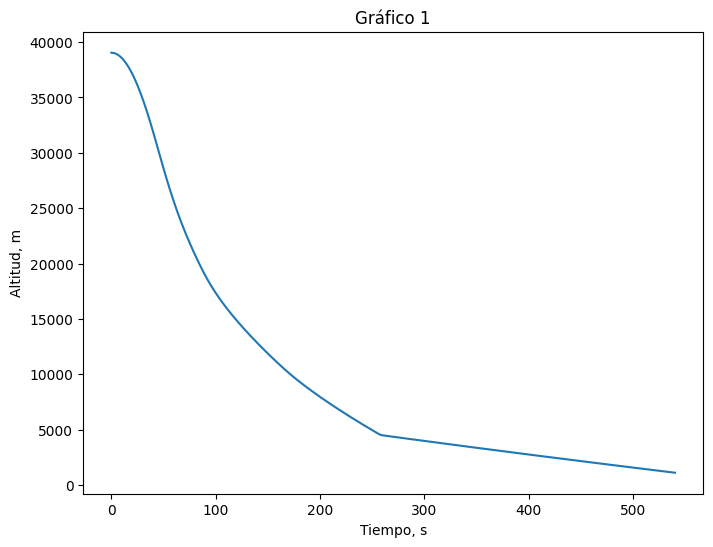

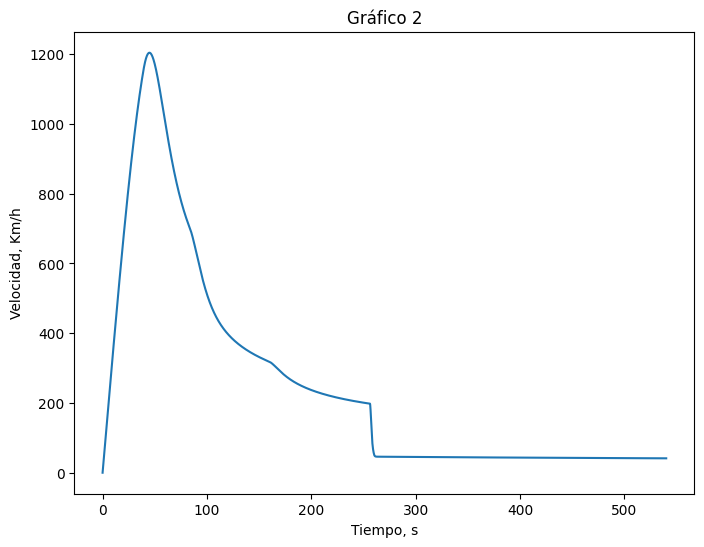

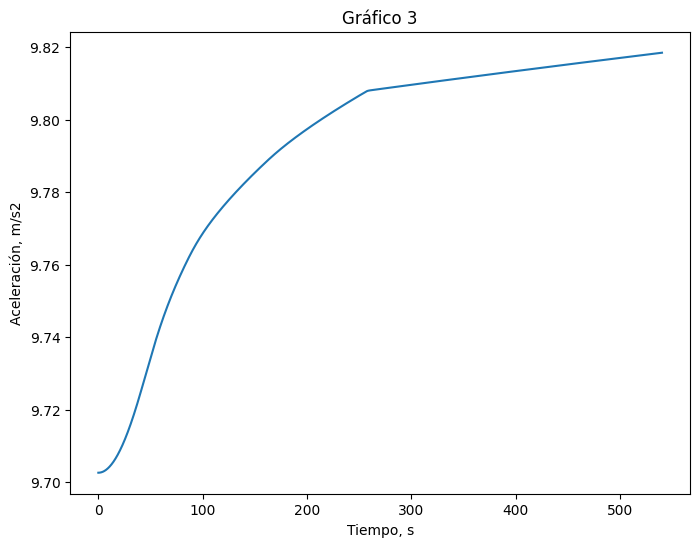

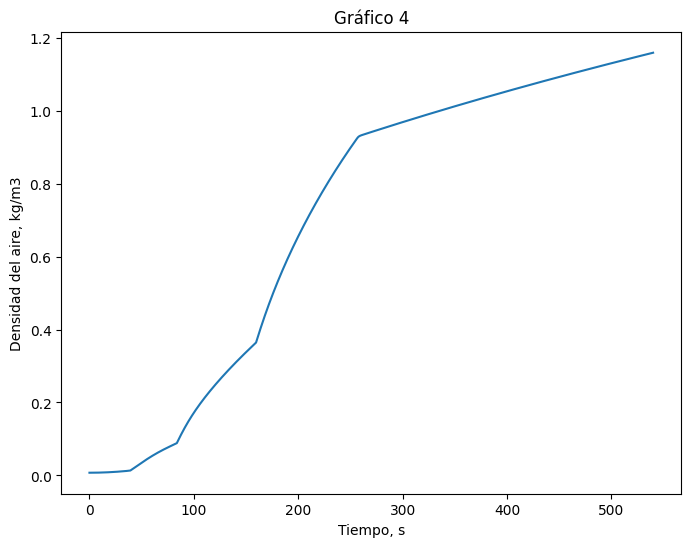

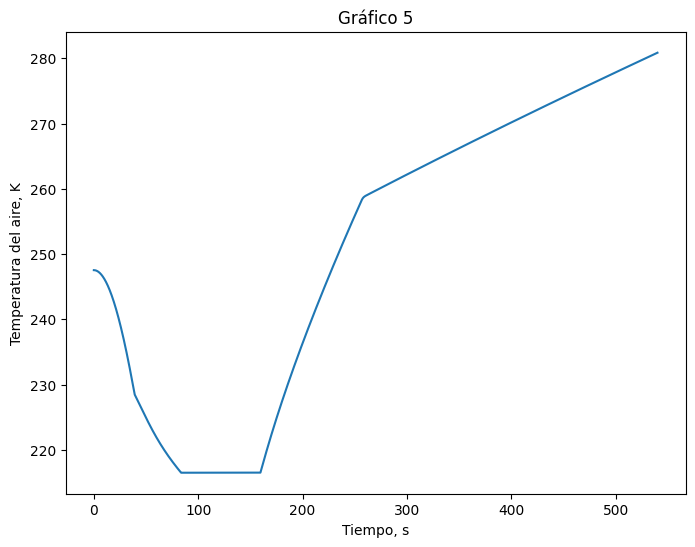

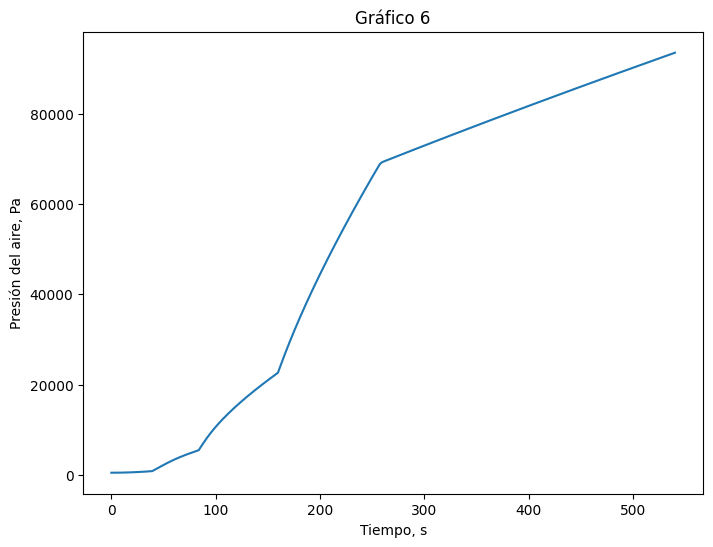

In [12]:
def graficar_paracaidismo():
    x, v, g, d, t, p = paracaidismo()

    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, x)
    plt.xlabel("Tiempo, s")
    plt.ylabel("Altitud, m")
    plt.title("Gráfico 1")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, v * 3.6 * (-1))
    plt.xlabel('Tiempo, s')
    plt.ylabel("Velocidad, Km/h")
    plt.title("Gráfico 2")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, g)
    plt.xlabel('Tiempo, s')
    plt.ylabel("Aceleración, m/s2")
    plt.title("Gráfico 3")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, d)
    plt.xlabel('Tiempo, s')
    plt.ylabel("Densidad del aire, kg/m3")
    plt.title("Gráfico 4")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, t)
    plt.xlabel('Tiempo, s')
    plt.ylabel("Temperatura del aire, K")
    plt.title("Gráfico 5")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(tiempos, p)
    plt.xlabel('Tiempo, s')
    plt.ylabel("Presión del aire, Pa")
    plt.title("Gráfico 6")
    plt.show()

if __name__ == '__main__':
    graficar_paracaidismo()

**Gráfico 1: Altitud vs Tiempo**: 
Comienza en una altitud inicial y disminuye gradualmente a medida que el paracaidista cae hacia la Tierra. La pendiente de la curva representa la velocidad de caída del paracaidista.

**Gráfico 2: Velocidad vs. Tiempo**:
Inicialmente, la velocidad aumenta debido a la aceleración de la gravedad. Luego, la velocidad alcanza un punto máximo cuando la resistencia del aire iguala la fuerza de la gravedad. A partir de ese punto, la velocidad disminuye gradualmente a medida que el paracaidista se acerca al suelo.

**Gráfico 3: Aceleración vs. Tiempo**:
La variación en la aceleración del paracaidista a lo largo del tiempo se debe a varios factores, siendo los principales la resistencia del aire y la variación en la aceleración gravitacional a medida que el paracaidista se mueve hacia la Tierra. El aumento progesivo de la aceleración se debe a la gravedad que actúa sobre el paracaidista a medida que se acerca al suelo. La resistencia del aire, aunque aumenta con la velocidad, no es suficiente para contrarrestar el aumento en la influencia gravitacional a medida que el paracaidista desciende hacia la Tierra.

**Gráfico 4: Densidad del aire vs. Tiempo**:
El leve aumento en la densidad del aire se debe a que la atmósfera terrestre es más densa cerca de la superficie debido a la compresión causada por el peso de la atmósfera sobre sí misma. A medida que el paracaidista desciende, atraviesa capas de la atmósfera con una densidad de aire creciente, lo que resulta en un aumento gradual de la densidad del aire experimentada durante el descenso.

**Gráfico 5: Temperatura del aire vs. Tiempo**:
Este patrón de temperatura se explica por las [variaciones en la atmósfera terrestre](https://es.wikipedia.org/wiki/Atm%C3%B3sfera_terrestre#:~:text=La%20temperatura%20es%20m%C3%A1xima%20en,a%20los%2012%20km%20de).

**Gráfico 6: Presión del aire vs. Tiempo**: 
Este aumento en la presión se debe a la compresión adiabática del aire a medida que desciende a través de la atmósfera.

#### VALIDACIÓN

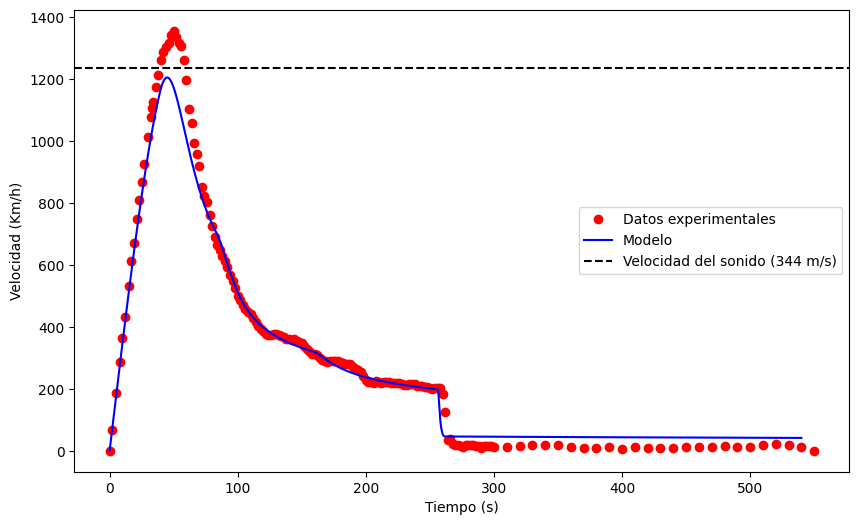

In [13]:
# La siguiente línea es para obtener la velocidad simulada (v) como variable global,
# porque antes estaba dentro de la función "paracaidismo".
x, v, g, densidad_del_aire_arreglo, temperatura_del_aire_arreglo, presion_del_aire_arreglo = paracaidismo()

plt.figure(figsize=(10, 6))

plt.plot(tiempo, velocidad, color='red', marker='o', linestyle='None', label='Datos experimentales')
plt.plot(tiempos, v * 3.6 * (-1), color='blue', label='Modelo')
plt.axhline(y=velocidad_del_sonido, color='black', linestyle='--', label='Velocidad del sonido (344 m/s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (Km/h)')
plt.legend()

En términos generales, se observa una buena respuesta del modelo en relación a los valores reales del experimento. Sin embargo, en el periodo de tiempo entre los 30 y los 70 segundos, la velocidad simulada responde subestimando la velocidad experimental. De hecho, el pico de velocidad máxima (que en realidad es la velocidad terminal al límite de la estratósfera), en el modelo no alcanza la velocidad del sonido. En ese punto máximo, la velocidad simulada es de 1206 km/h y del dato experimental es de 1357 km/h, o sea, una diferencia de 151 km/h. 
El modelo responde muy bien en la segunda fase, la tropósfera, luego de los 70 segundos hasta los 260 segundos cuando se abre el paracaidas. Cuando la aceleración disminuye y la velocidad prácticamente se estabiliza en una línea horizontal (a partir de los 260 segundos), el modelo tiende a sobreestimar levemente la velocidad real. Esta tendencia se mantiene hasta el tiempo final.

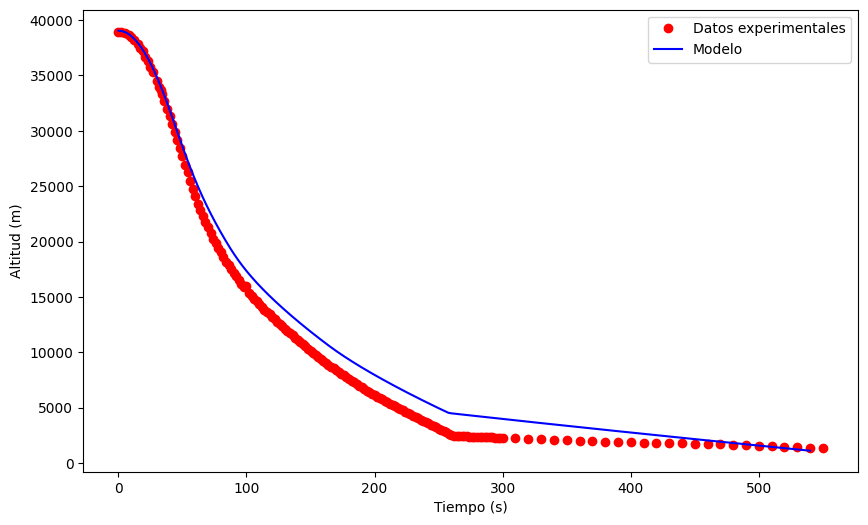

In [14]:
plt.figure(figsize=(10, 6))

plt.plot(tiempo, altitud, color='red', marker='o', linestyle='None', label='Datos experimentales')
plt.plot(tiempos, x, color='blue', label='Modelo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altitud (m)')
plt.legend()

En general, se observa que el modelo responde relativamente bien a los datos reales desde el tiempo 0, pero a partir de los 50 segundos comienza a sobreestimar la altitud. Esta sobreestimación crece progresivamente hasta llegar a un máximo a los 270 segundos aproximadamente donde la altitud simulada es de 4320 m y el dato experimental es de 2500 m, o sea una diferencia de 1820 m. Posteriormente, la diferencia comienza a decrecer hasta el tiempo 470 segundos donde ambos datos se intersectan. Sobre el final del modelo, aproximadamente a los 550 segundos, el modelo pareciera que muy levemente respondería a la tendencia de subestimar los datos experimentales. 

#### PUNTOS CRÍTICOS

Recordando las ecuaciones diferenciales del sistema son:

$
\frac{dx}{dt} = v \quad \text{(Velocidad)}
$  

$
\frac{dv}{dt} = \frac{1}{m} \cdot \frac{1}{2} \cdot \rho \cdot C_d \cdot A \cdot v^2 - g \quad \text{(Aceleración)}
$

Para encontrar los puntos críticos, se deben igualar las derivadas a cero y resolver el sistema resultante:

1. La primera ecuación es:
 
$
\frac{dx}{dt} = v
$  

Para que haya un punto crítico hay que hacer:  

$
v = 0
$

2. La segunda ecuación es:
   
$
\frac{dv}{dt} = \frac{1}{m} \cdot \frac{1}{2} \cdot \rho \cdot C_d \cdot A \cdot v^2 - g
$  

Para que haya un punto crítico, entonces hay que hacer:

$
\frac{dv}{dt} = 0
$ 

Sustituyendo $v$ $=$ $0$ en esta ecuación:

$
0 = \frac{1}{m} \cdot \frac{1}{2} \cdot \rho \cdot C_d \cdot A \cdot (0)^2 - g
$

$
0 = - g
$

Esto es una contradicción, ya que la aceleración gravitacional $g$ no puede igualarse a cero. Esto demuestra que no hay valores de $v$ que satisfagan ambas condiciones simultáneamente. Por lo tanto, analíticamente no hay puntos críticos en este sistema de ecuaciones diferenciales.

----

Ya que no hay puntos críticos, podría intentar calcularse la velocidad terminal, dado que es una solución de equilibrio particular donde la aceleración del paracaidista se iguala a cero, pero esto no corresponde a un punto crítico en el sentido clásico de un sistema de EDOs.

Para encontrar la velocidad terminal $v_t$, hay que encontrar el punto donde la aceleración $\frac{{dv}}{{dt}}$ se iguala a $0$. Partiendo de la ecuación de aceleración:

$
\frac{dv}{dt} = \frac{1}{m} \cdot \frac{1}{2} \cdot \rho \cdot C_d \cdot A \cdot v^2 - g
$

En la velocidad terminal, la aceleración es cero, por lo tanto:

$
0 = \frac{1}{m} \cdot \frac{1}{2} \cdot \rho \cdot C_d \cdot A \cdot v_t^2 - g
$

Resolviendo esta ecuación para $v_t$:

$
\frac{1}{2} \cdot \frac{\rho \cdot C_d \cdot A \cdot v_t^2}{m} = g
$

$
\frac{\rho \cdot C_d \cdot A \cdot v_t^2}{2m} = g
$

Hay que multiplicar ambos lados por $2m$ para despejar $v_t$ $^2$:  

$
\rho \cdot C_d \cdot A \cdot v_t^2 = 2mg
$

Ahora se puede dividir ambos lados por $\rho \cdot C_d \cdot A$:

$
v_t^2 = \frac{2mg}{\rho \cdot C_d \cdot A}
$

Finalmente, tomando la raíz cuadrada de ambos lados para encontrar $v_t$:

$
v_t = \sqrt{\frac{2mg}{\rho \cdot C_d \cdot A}}
$

Entonces, la velocidad terminal $v_t$ es:

$
v_t = \sqrt{\frac{2mg}{\rho \cdot C_d \cdot A}}
$

**ver Müller, 2013** (Bibliografía)

Esta velocidad terminal es la velocidad constante que alcanza el paracaidista cuando la fuerza de arrastre debida al aire balancea exactamente la fuerza de la gravedad (Theilmann, et al. 2013).

- Si $v$ $<$ $v_t$: $\frac{dv}{dt}$ $>$ $0$, lo que significa que la velocidad aumenta hacia $v_t$.
  
- Si $v$ $>$ $v_t$: $\frac{dv}{dt}$ $<$ $0$, lo que significa que la velocidad disminuye hacia $v_t$.

Esto demuestra que la velocidad terminal $v_t$ es un punto de equilibrio estable, lo que implica que la velocidad del paracaidista tenderá a este valor a medida que el tiempo progresa.

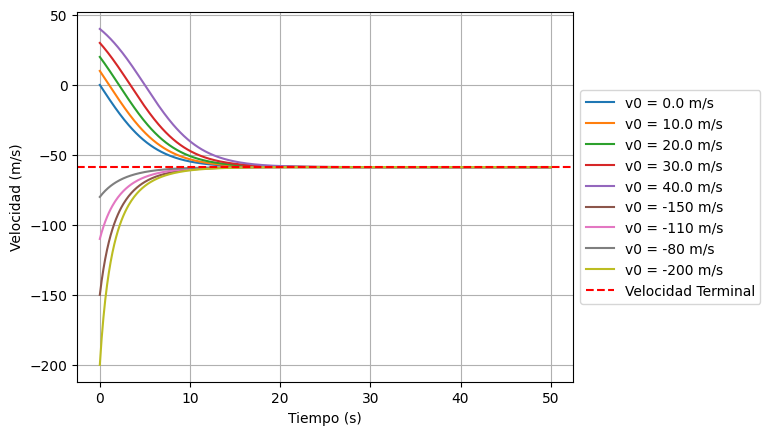

In [15]:
# Para graficar la velocidad terminal para distintas condiciones iniciales,
# se crea nuevamente la función de la simulación del paracaidismo, pero más simple, 
# y se crea otra una función para calcular la velocidad terminal en base al 
# análisis anterior. Por último se eligen varias condiciones iniciales 
# hipotéticas y se grafica la velocidad en función del tiempo para cada una de ellas.

from scipy.integrate import odeint

def paracaidista(v, t, m, rho, Cd, A, g):
    dvdt = (1/(2*m)) * rho * Cd * A * v**2 - g
    return dvdt

def velocidad_terminal(m, rho, Cd, A, g):
    v_terminal = (-1)*np.sqrt((2*m*g) / (rho * Cd * A))
    return v_terminal

# Parámetros del problema
m = 118.0        # masa del paracaidista y equipo (kg)
rho = 1.15       # densidad del aire (kg/m^3)
Cd = 0.8        # coeficiente de arrastre (adimensional)
A = 0.73         # área transversal (m^2)
g = 9.81        # aceleración gravitacional (m/s^2)

# Condiciones iniciales y tiempo de integración
v0_valores = [0.0, 10.0, 20.0, 30.0, 40.0, -150, -110, -80, -200]  # diferentes velocidades iniciales (m/s)
t = np.linspace(0, 50, 500)    # vector de tiempo de integración (s)

# Se resuelve la ecuación diferencial para las diferentes condiciones iniciales
for v0 in v0_valores:
    sol = odeint(paracaidista, v0, t, args=(m, rho, Cd, A, g))
    plt.plot(t, sol[:,0], label=f'v0 = {v0} m/s')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.axhline(y=velocidad_terminal(m, rho, Cd, A, g), color='r', linestyle='--', label='Velocidad Terminal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

A pesar de lo que podría asumirse viendo el gráfico y el desarrollo analítico, se reitera que la velocidad terminal no es un atractor, dado que acá no se consideró el sistema de ecuaciones del modelo, sino que solamente se graficó, a modo interactivo, la velocidad terminal y su comportamiento hipotético para varias condiciones iniciales. La idea se tomó de la página 5 de Theilmann, et al. 2013.

La primera ecuación del sistema (velocidad) nos da información de la pendiente de la recta, que en este caso es 0 porque es constante. Por otro lado, la segunda ecuación (aceleración), en realidad, es una reducción de la derivada de segundo orden: $\frac{{d^2v}}{{dt^2}}$, y da información acerca de la concavidad de las curvas de velocidad en el gráfico. 

#### BIBLIOGRAFÍA

1. **Gössling, A. Becker, S. Kuhn, J**. 2021. Hands-on Experiment for Modeling the Baumgartner Jump Using Free-Fall Kinematics with Drag. Phys. Teach. 59, 11. https://doi.org/10.1119/10.0003464  
2. **Guerster, M. Walter, U**. 2017. Aerodynamics of a highly irregular body at transonic speeds—Analysis of STRATOS flight data. PLoS ONE 12(12): e0187798. https://doi.org/10.1371/journal.pone.0187798 
3. **Müller, A**. 2013. Supersonic Jump. Phys. Teach. 51, 14–15 (2013) https://doi.org/10.1119/1.4772029
4. **Theilmann, F. Apolin, M**. 2013. Supersonic freefall - A modern adventure as a topic for the physics class. Physics Education 48(2):150. March 201348(2):150. https://doi.org/10.1088/0031-9120/48/2/150
5. **Zavala, J. Menendez, J**. 2021. Kinematic analysis of Felix Baumgartner's Stratospheric Jump in 2012. Journal of Student Research. Volume 10 Issue 3. https://doi.org/10.47611/jsrhs.v10i3.1580 

#### FINAL

Con este salto, Felix Baumgartner logró varios [Récords Guiness](https://www.guinnessworldrecords.es/records/hall-of-fame/felix-baumgartner-first-person-to-break-sound-barrier-in-freefall):

- El globo más grande con una persona a bordo (850.000 m³).
- La altitud más alta sin ataduras fuera de un vehículo (39 km).
- Primer humano en romper la barrera del sonido en caída libre ($vel_{máx}$ 1.357,6 km/h)
- El mayor número de vistas simultáneas para un evento en vivo en YouTube (ocho millones de personas).

<img src="./imagenes/felix1.jpg" width="500" height="400">